# **Installing packages ans importing libraries**

In [ ]:
!pip install -q pyomo
from pyomo.environ import *
import numpy as np

!apt-get install -y -qq glpk-utils


# Exercise 3 (Problem Statement and Model with solver



```
# This is formatted as code
```

**Question**


Let x be the 10x1 vector of quantity(in tons) of alloy Ai from in house stock.

Let y be the 10x1 vector of the quantity(in tons) of the alloy Ai that is purchased from the market for the production. 

Then our problem reduces to solving the following problem.

C1 is the cost vector for in house stock.

C2 is the cost vector for the purchase made.

A is the matrix of coefficients of constraints. 

b is the vector of rhs of constraints. 

u is the upper bound vector for x.

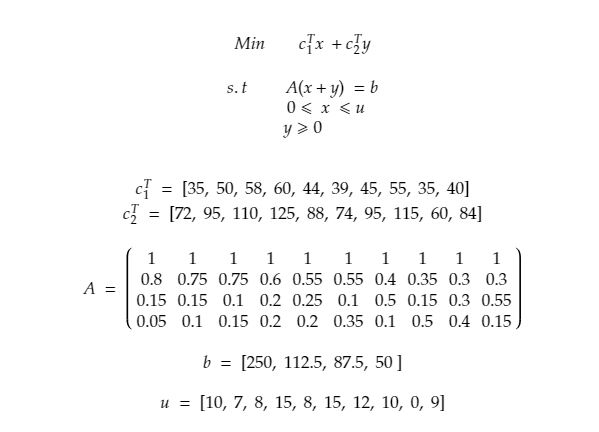

In [ ]:
model = ConcreteModel()


# Creating number of rows and columns for indexing 

N = 10
M = 4

col_index = np.arange(N)
row_index = np.arange(M)

# Creating model and constrainsts

model.x = Var(col_index)
model.y = Var(col_index)
model.cons = ConstraintList()       # -> Initialising the constraint list

# Creatinf coefficients for objective funtion

coeff_obj_x = np.array([ 35, 50, 58, 60, 44, 39, 45, 55,35, 40])
coeff_obj_y = np.array([ 72, 95, 110, 125, 88, 74, 95, 115, 60, 84])

# Coefficient matrix 'A' for constraints, rhs vector 'b' , and upper bound vector 'u' for x 

coeff_matrix_A = np.array([[1,1,1,1,1,1,1,1,1,1,],
                           [0.8, 0.75, 0.75, 0.6, 0.55, 0.55, 0.4, 0.35, 0.3, 0.3],
                           [0.15, 0.15, 0.1, 0.2, 0.25, 0.1, 0.5, 0.15, 0.3, 0.55],
                           [0.05, 0.1, 0.15, 0.2, 0.2, 0.35, 0.1, 0.5, 0.4, 0.15]
                           ])

rhs_cons_b = np.array([ 250, 112.5, 87.5, 50 ])

upper_bound_x = np.array([ 10, 7, 8, 15, 8, 15, 12, 10, 0, 9])


# Adding model objective and constraints 

model.objective = Objective(expr =sum(coeff_obj_x[i] * model.x[i] for i in col_index) + sum(coeff_obj_y[i] * model.y[i] for i in col_index), sense=minimize )

for i in row_index:
  model.cons.add(sum(coeff_matrix_A[i,j] * (model.x[j] + model.y[j]) for j in col_index ) == rhs_cons_b[i])


for i in col_index:
  model.x[i].setub(upper_bound_x[i])
  model.x[i].setlb(0)
  model.y[i].setlb(0)

model.pprint()


# Solving the model with the solver

SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()



3 Set Declarations
    cons_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {1, 2, 3, 4}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
    y_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

2 Var Declarations
    x : Size=10, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :    10 : False :  True :  Reals
          1 :     0 :  None :     7 : False :  True :  Reals
          2 :     0 :  None :     8 : False :  True :  Reals
          3 :     0 :  None :    15 : False :  True :  Reals
          4 :     0 :  None :     8 : False :  True :  Reals
          5 :     0 :  None :    15 : False :  True :  Reals
          6 :     0

# Ex3 Results ans Solutions

In [ ]:
# Results

print('The value of the objective function is {}'.format(model.objective()))


print('\nDecision Variables')
for i in col_index:
  print('x[',i,'] = ', model.x[i].value)
  print('y[',i,'] = ', model.y[i].value)

print('\nConstraints')
model.cons.display()


The value of the objective function is 16238.44

Decision Variables
x[ 0 ] =  10.0
y[ 0 ] =  28.6
x[ 1 ] =  7.0
y[ 1 ] =  0.0
x[ 2 ] =  8.0
y[ 2 ] =  0.0
x[ 3 ] =  15.0
y[ 3 ] =  0.0
x[ 4 ] =  8.0
y[ 4 ] =  0.0
x[ 5 ] =  15.0
y[ 5 ] =  0.0
x[ 6 ] =  12.0
y[ 6 ] =  0.0
x[ 7 ] =  0.0
y[ 7 ] =  0.0
x[ 8 ] =  0.0
y[ 8 ] =  52.64
x[ 9 ] =  9.0
y[ 9 ] =  84.76

Constraints
cons : Size=4
    Key : Lower : Body  : Upper
      1 : 250.0 : 250.0 : 250.0
      2 : 112.5 : 112.5 : 112.5
      3 :  87.5 :  87.5 :  87.5
      4 :  50.0 :  50.0 :  50.0


**Exercise 3 Part 4**

Among the alloys that need to be bought from the market, which three alloys are ranked
high in terms of the quantities to be bought and which three alloys are ranked low?

In [190]:
# Making an array of names of different alloys

alloy_names = np.array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'])


#Initilising an array for values of y i.e for all the purchases made from market for Ai  where i =1,2,3....9,10
y_array = np.arange(10, dtype=float)


# Putting the value from the solver to the array
for i in col_index:
  y_array[i] = model.y[i].value

# Sorting the array in ascending order
y_array_sorted = y_array.argsort()

#Finding the top 3 and bottom 3 alloys

max_3 = []
min_3 = []

for i in range(3):
  max_3.append(y_array[y_array_sorted][N-i-1])
  min_3.append(y_array[y_array_sorted][i])

# Creating the list of alloy named for the 3 maximum quantitites that are purchased

dummy1 = []
for i in max_3:
  dummy1.append(alloy_names[y_array == i])
  
max_3_names =[]
for i in range(len(dummy1)):
  max_3_names.append(dummy1[i][0])


# Creating the list of alloy named for the 3 minimum quantitites that are purchased

dummy2 = []
for i in min_3:
  dummy2.append(alloy_names[y_array == i])
  
min_3_names =[]

for i in range(len(dummy2)):
  min_3_names.append(dummy2[0][:,])






print('The maximum three purchases are, ', max_3, ' and their respective names are', max_3_names)
print('The minimum three purchases are, ', min_3, ' and their respective names are', min_3_names)  
  

The maximum three purchases are,  [84.76, 52.64, 28.6]  and their respective names are ['A10', 'A9', 'A1']
The minimum three purchases are,  [0.0, 0.0, 0.0]  and their respective names are [array(['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'], dtype='<U3'), array(['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'], dtype='<U3'), array(['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'], dtype='<U3')]


**Exercise 3 Part 5**

Is there any alloy whose stock is completely utilized? Why?

In [193]:


# Initialising an array for the quantities of alloy that are in stock.

x_array = np.arange(10, dtype=float)

#Creating the array of x by the values from the solver i.e the solution values

for i in col_index:
  x_array[i] = model.x[i].value


#Stock before and after 

stock_before = upper_bound_x

stock_after = stock_before - x_array

alloy_utilised = stock_after == 0

alloy_utilised_names = alloy_names[alloy_utilised]


print('List of the alloy which are completely utilised are , ',alloy_utilised_names)

print('The stocks of all the alloys are utilised except A8 stock.' )



List of the alloy which are completely utilised are ,  ['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A9' 'A10']
The stocks of all the alloys are utilised except A8 stock.


**Exercise 3 Part 6**

Is there any alloy which need not be acquired from market? Why?

In [ ]:
alloy_not_purchased = list(alloy_names[y_array == 0])

print('The list of alloys that are not purchased from the market are, ',alloy_not_purchased)

The list of alloys that are not purchased from the market are,  ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
